In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem.porter import PorterStemmer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
stemmer = PorterStemmer()

def nltk_stemmer(s):
    stemmed_words = []
    token_list = s.split(" ")
    for word in token_list:
        stemmed_words.append(stemmer.stem(word))
    return " ".join(stemmed_words)

In [3]:
df = pd.read_csv("train.csv", usecols=["cleanedreddit", "label"])
df["cleanedreddit"] = df["cleanedreddit"].apply(nltk_stemmer)
train_inputs = df["cleanedreddit"].to_list()
train_labels = df["label"].to_list()

df = pd.read_csv("val.csv", usecols=["cleanedreddit", "label"])
df["cleanedreddit"] = df["cleanedreddit"].apply(nltk_stemmer)
val_inputs = df["cleanedreddit"].to_list()
val_labels = df["label"].to_list()

In [4]:
# Get tfidf representations of documents
tfidf = TfidfVectorizer().fit(train_inputs)
X = tfidf.transform(train_inputs)

In [5]:
classifier = LogisticRegression(max_iter=5000).fit(X, train_labels)
#classifier = KNeighborsClassifier(50).fit(X, train_labels)

In [6]:
X_val = tfidf.transform(val_inputs)

print("Logistic Regression Classifier:")
val_predictions = classifier.predict(X_val)
print(accuracy_score(val_predictions, val_labels))

Logistic Regression Classifier:
0.8929465301478954


In [7]:
df = pd.read_csv("test.csv", usecols=["cleanedreddit", "label"])
df["cleanedreddit"] = df["cleanedreddit"].apply(nltk_stemmer)
test_inputs = df["cleanedreddit"].to_list()
test_labels = df["label"].to_list()

X_test = tfidf.transform(test_inputs)
print("Logistic Regression Classifier:")
test_predictions = classifier.predict(X_test)
print(classification_report(test_labels, test_predictions, digits=4))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0     0.8091    0.9750    0.8844       200
           1     0.8391    0.9650    0.8977       200
           2     0.9845    0.6350    0.7720       200

    accuracy                         0.8583       600
   macro avg     0.8776    0.8583    0.8514       600
weighted avg     0.8776    0.8583    0.8514       600



In [8]:
df = pd.read_csv("twitter_test.csv", usecols=["cleanedtweet", "label"])
df["cleanedtweet"] = df["cleanedtweet"].apply(nltk_stemmer)
test_inputs = df["cleanedtweet"].to_list()
test_labels = df["label"].to_list()

X_test = tfidf.transform(test_inputs)
print("Logistic Regression Classifier:")
test_predictions = classifier.predict(X_test)
print(classification_report(test_labels, test_predictions, digits=4))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0     0.9883    0.8450    0.9111       200
           1     0.8914    0.9850    0.9359       200
           2     0.9231    0.9600    0.9412       200

    accuracy                         0.9300       600
   macro avg     0.9343    0.9300    0.9294       600
weighted avg     0.9343    0.9300    0.9294       600



In [9]:
data = TSNE(n_components=2, init="random").fit_transform(X)

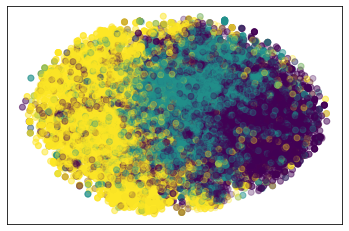

In [10]:
plt.scatter(data[:,0], data[:,1], c=train_labels, alpha=0.3)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()